In [1]:
import torch
from torch import nn
import torchvision
import torchlens as tl
from importlib import reload

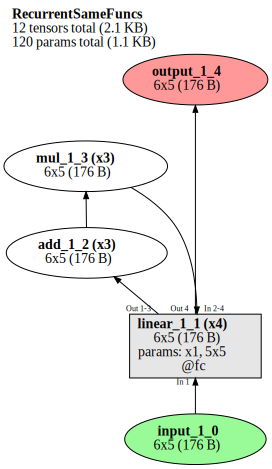

Log of RecurrentSameFuncs forward pass:
	Model structure: recurrent (at most 4 loops), without branching; 1 total modules.
	12 tensors (2.1 KB) computed in forward pass; 12 tensors (2.1 KB) saved.
	8 parameter operations (120 params total; 1.1 KB).
	Random seed: 2849971872
	Time elapsed: 0.017s
	Module Hierarchy:
		fc
		fc
		fc
		fc
	Layers:
		0: input_1_0 
		1: linear_1_1:1  (1/4 passes)
		2: add_1_2:1  (1/3 passes)
		3: mul_1_3:1  (1/3 passes)
		4: linear_1_1:2  (2/4 passes)
		5: add_1_2:2  (2/3 passes)
		6: mul_1_3:2  (2/3 passes)
		7: linear_1_1:3  (3/4 passes)
		8: add_1_2:3  (3/3 passes)
		9: mul_1_3:3  (3/3 passes)
		10: linear_1_1:4  (4/4 passes)
		11: output_1_4 

In [2]:
tl = reload(tl)


class RecurrentSameFuncs(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Linear(in_features=5, out_features=5)

    def forward(self, x):
        x = self.fc(x)
        x = x + 1
        x = x * 2
        x = self.fc(x)
        x = x + 1
        x = x * 2
        x = self.fc(x)
        x = x + 1
        x = x * 2
        x = self.fc(x)
        return x


model = RecurrentSameFuncs()
x = torch.rand(6, 5)
tl.get_model_activations(model, x, vis_opt='rolled')
